In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


NameError: name 'pandas' is not defined

In [21]:
def tobool(val):
    if val == "":
        return False
    if val == "0":
        return False
    return True
        
    
df = pd.read_csv("../analysis/input.csv", 
                 dtype={'smoking_status': 'category', 
                        'imd': 'category', 
                        'age': 'int', 
                        'asthma': 'boolean',
                        'hba1c_percentage': 'float'}, 
                 converters = {'asthma': tobool},
                 parse_dates=['icu_date_admitted'])

# pd.read_csv(pd.compat.StringIO(data), dtype={'col1':'category'})

<ipython-input-21-964e0ecd2554>:9: ParserWarning: Both a converter and dtype were specified for column asthma - only the converter will be used
  df = pd.read_csv("../analysis/input.csv",


In [34]:
asd = df.describe(include='all')

In [38]:
qwe = asd.T

In [39]:
qwe['plot'] = 5

In [52]:
df.dtypes

patient_id                                       int64
icu_date_admitted                       datetime64[ns]
died_date_cpns                                  object
died_ons_covid_flag_any                          int64
died_ons_covid_flag_underlying                   int64
died_date_ons                                   object
age                                              int64
sex                                             object
imd                                           category
rural_urban                                      int64
stp                                             object
region                                          object
bmi                                            float64
bmi_date_measured                               object
smoking_status_date                             object
most_recent_unclear_smoking_cat                 object
most_recent_unclear_smoking_numeric            float64
most_recent_unclear_smoking_cat_date            object
ethnicity 

In [22]:
df.asthma.value_counts()

False    90362
True     14305
Name: asthma, dtype: int64

In [ ]:
def sparkline(data, chart_type="hist"):
    fill_color='blue'
    fill_alpha=0.1
    point_fill='red'
    point_alpha=1
    point_size=6
    fig = plt.figure(figsize=(4, 0.25))
    ax = fig.add_subplot(111)

    if chart_type == "hist":
        plt.hist(data,)
    elif chart_type == "bar":
        plt.bar(data, height=3)
    
    # turn off all axis annotations    
    ax.axis('off')

    # squeeze axis to the edges of the figure
    fig.subplots_adjust(left=0)
    fig.subplots_adjust(right=0.99)
    fig.subplots_adjust(bottom=0.1)
    fig.subplots_adjust(top=0.9)

In [5]:
df.head()

,patient_id,icu_date_admitted,died_date_cpns,died_ons_covid_flag_any,died_ons_covid_flag_underlying,died_date_ons,age,sex,imd,rural_urban,...,bp_dias_date_measured,hba1c_mmol_per_mol,hba1c_mmol_per_mol_date,hba1c_percentage,hba1c_percentage_date,ra_sle_psoriasis,gi_bleed_and_ulcer,inflammatory_bowel_disease,smoking_status,asthma
0,1323602,NaN,NaN,0,0,NaN,88,F,21000,1,...,2001-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,S,0
1,1323717,NaN,NaN,0,0,NaN,88,F,21000,1,...,2001-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,S,0
2,1323733,NaN,NaN,0,0,NaN,88,F,21000,1,...,2001-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,S,0
3,1323749,NaN,NaN,0,0,NaN,55,M,1200,3,...,2001-06,0.0,NaN,6.1,2001-06,NaN,NaN,NaN,E,0
4,1327008,NaN,NaN,0,0,NaN,55,M,1200,3,...,2001-06,0.0,NaN,6.1,2001-06,NaN,NaN,NaN,E,0


In [30]:
for col in df.columns:
    if col.endswith("_date"):
        sparkline(pd.to_datetime(df[col]))

In [32]:
for col in df.columns:
    if "flag" in col:
        sparkline(df[col])

In [35]:
df.groupby("inflammatory_bowel_disease").count()

,patient_id,icu_date_admitted,died_date_cpns,died_ons_covid_flag_any,died_ons_covid_flag_underlying,died_date_ons,age,sex,imd,rural_urban,...,bp_dias,bp_dias_date_measured,hba1c_mmol_per_mol,hba1c_mmol_per_mol_date,hba1c_percentage,hba1c_percentage_date,ra_sle_psoriasis,gi_bleed_and_ulcer,smoking_status,asthma
inflammatory_bowel_disease,,,,,,,,,,,,,,,,,,,,,
1900-01,3,0,0,3,3,0,3,3,3,3,...,3,3,3,0,3,0,0,0,3,3
1947-01,1,0,0,1,1,0,1,1,1,1,...,1,1,1,0,1,0,0,1,1,1
1948-07,3,0,0,3,3,0,3,3,3,3,...,3,3,3,0,3,0,0,0,3,3
1951-12,1,0,0,1,1,0,1,1,1,1,...,1,0,1,0,1,0,0,0,1,1
1953-07,1,0,0,1,1,0,1,1,1,1,...,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-01,1,0,0,1,1,0,1,1,1,1,...,1,1,1,0,1,0,0,0,1,1
2001-03,2,0,0,2,2,0,2,2,2,2,...,2,1,2,0,2,0,0,0,2,2
2001-06,2,0,0,2,2,0,2,2,2,2,...,2,1,2,0,2,0,0,0,2,2


In [28]:
pd.to_datetime(df.hba1c_percentage_date)

0               NaT
1               NaT
2               NaT
3        2001-06-01
4        2001-06-01
            ...    
104662          NaT
104663          NaT
104664          NaT
104665          NaT
104666          NaT
Name: hba1c_percentage_date, Length: 104667, dtype: datetime64[ns]

In [37]:
sparkline(pd.to_datetime(df['inflammatory_bowel_disease']))

/home/seb/.pyenv/versions/3.8.1/envs/stata-docker/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/seb/.pyenv/versions/3.8.1/envs/stata-docker/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [38]:
pd.to_datetime(df['inflammatory_bowel_disease']).describe()

count                     153
unique                    108
top       1989-05-01 00:00:00
freq                       14
first     1900-01-01 00:00:00
last      2010-10-01 00:00:00
Name: inflammatory_bowel_disease, dtype: object

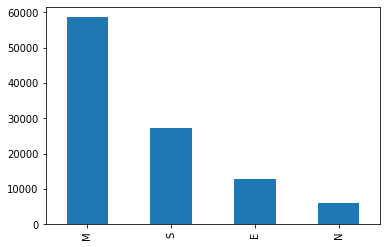

In [13]:
df.smoking_status.value_counts().plot(kind='bar')